---
title: PCA
format: html
bibliography: project_reference.bib
---

## What is PCA?

PCA stands for principal component analysis. It is a machine learning technique that is used to reduce the dimensionality of large datasets. The goal of PCA is to reduce the number of variables while preserving as much information as possible. [@noauthor_principal_nodate]

PCA can be broken down into five steps: 

1) Standardization
2) Covariance Matrix Computation
3) Computing the eigenvectors and eigenvalues to identify principal components
4) Feature Vectors 
5) Recasting data among principal component axis

I will walk through these steps and code within this tab and provide code that completes these steps... although you can just use PCA from the sklearn to complete PCA without manually doing all the steps . :))))))))

To learn more about PCA in depth this is a good resource [here](https://builtin.com/data-science/step-step-explanation-principal-component-analysis).


## Applying PCA to Data

### Objectives 

The objective of PCA on my data is to reduce the dimensionality. 

### Data Set Selection 

I will be applying PCA to my merged dataset that includes the variables, Country, Year, Aqua Production, Marine Protected Areas, Inventions, Instruments, Fishing Exports and % of policy instruments related to ocean policy.  

### Tools I will be using

I will complete PCA in Python. The library that will help me the most in this tab is sklearn!

## PCA Code Walkthrough 

### Importing Necessary Libraries

In [37]:
#| code-fold: true
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

### Importing Data

In [38]:
#| code-fold: true
pca = pd.read_csv("/Users/kendallgilbert/dsan-5000-project-kendallgilbert180/dsan-website/5000-website/data/01-modified-data/nb_record.csv")
label_encoder = LabelEncoder()
pca['Country'] = label_encoder.fit_transform(pca['Country'])
pca.head(5)

,Aqua Production (Millions),Marine Protected Area (sqkm),Inventions (number),Instruments (number),Fishing Exports (Millions),Value,Country,Year
0,376896.50,485.10,12.00,5.0,1963.38,10.64,11,2000
1,55.25,5.65,0.33,0.0,739.13,0.00,12,2000
2,24661.75,605.08,23.33,8.0,4431.00,5.23,13,2000
3,8849.75,2124.58,1.00,4.0,3118.12,19.05,14,2000
4,29421.75,235.18,0.00,0.0,321.71,0.00,15,2000


### Standardization

In [39]:
#| code-fold: true
X = pca.drop(columns=['Country'])
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

### Co-Variance Matrix

Covariance measures how two features vary with each other. A **positive** covariance indicates that features increase and decrease together. Whereas, a **negative** covariance indicates that the two features vary in the opposite directions [@noauthor_principal_nodate]. This matrix includes all covariances associated with all possible pairs of the initial variables.

In [40]:
#| code-fold: true
cov_matrix = np.cov(X_standardized, rowvar=False)
print(cov_matrix)

[[ 1.00194175 -0.03049421  0.15115429  0.22811143  0.02736602 -0.11929489
   0.16282702]
 [-0.03049421  1.00194175  0.07505357 -0.10884402  0.82865356 -0.02391984
   0.06557357]
 [ 0.15115429  0.07505357  1.00194175  0.08170361  0.11374335 -0.15312207
   0.04188815]
 [ 0.22811143 -0.10884402  0.08170361  1.00194175  0.06127009  0.58777159
   0.11096496]
 [ 0.02736602  0.82865356  0.11374335  0.06127009  1.00194175  0.12072438
   0.11089752]
 [-0.11929489 -0.02391984 -0.15312207  0.58777159  0.12072438  1.00194175
   0.01934582]
 [ 0.16282702  0.06557357  0.04188815  0.11096496  0.11089752  0.01934582
   1.00194175]]


### Computing Eigen Values and Eigen Vectors

Eigen values and eigen vectors are a linear algebra concept. These values are computed from the covariance matrix and help with determining the principal components. 

Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations result in new variables (principal components) that are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components.[@noauthor_principal_nodate]. 

In [41]:
#| code-fold: true
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)

Eigenvalues:
[0.15354681 0.30246714 1.87872189 1.63494736 1.30649672 0.787713
 0.94969931]
Eigenvectors:
[[-0.03084694 -0.28856822 -0.06626171  0.1718304  -0.65853337  0.66737184
   0.05300179]
 [-0.69771318  0.05888819 -0.66508565 -0.19819073  0.12985032  0.10594535
   0.00494806]
 [-0.03471916 -0.16908509 -0.15650007 -0.0428144  -0.51456224 -0.5373596
  -0.62477983]
 [-0.06921197  0.67433775 -0.08956347  0.70522824 -0.07998613  0.03219644
  -0.1663593 ]
 [ 0.70644581  0.02634234 -0.69324472 -0.0425596   0.09906735  0.0859372
  -0.02532377]
 [-0.08239763 -0.65482314 -0.10477276  0.63696157  0.3682022  -0.09337857
  -0.05854486]
 [-0.01984967 -0.02126341 -0.17085375  0.15647184 -0.36457294 -0.48733326
   0.7583352 ]]


### Choosing Principal Components

Computing the eigenvectors and ordering them by their eigenvalues in descending order allow us to find the principal components in order of significance. In this step, we discard low eigen values and form with the remaining ones a matrix of vectors that we call a feature vector.

Principal components represent the directions of the data that explain a maximal amount of variance. Within the code below, I am determing the number of components that maximize the variance. 

We can think of principal components as new variables that are constructed as linear combinations or mixtures of the initial variables. They are the new axes that provide the best angle to see and evaluate the data. These principal componenets make it easier to see the difference between variables. 

Number of components to capture 50.0% variance: 2


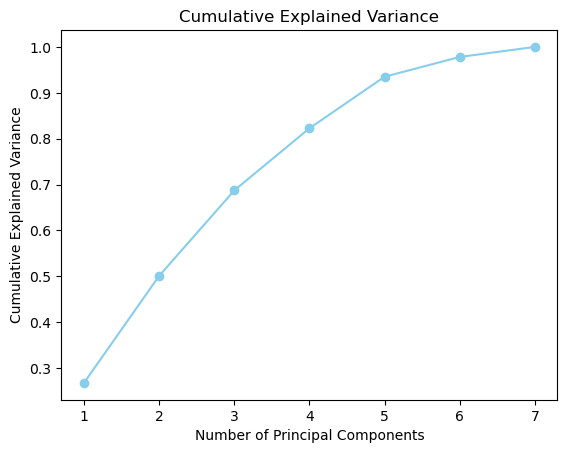

In [42]:
#| code-fold: true
# Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='skyblue')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

desired_variance = 0.50 #I want to find the number of variables it takes to reach a variance of 0.5
num_components = np.argmax(cumulative_explained_variance >= desired_variance) + 1
print(f"Number of components to capture {desired_variance * 100}% variance: {num_components}")

Explained Variance Ratio for Each Component:
[0.26786871 0.23311127]


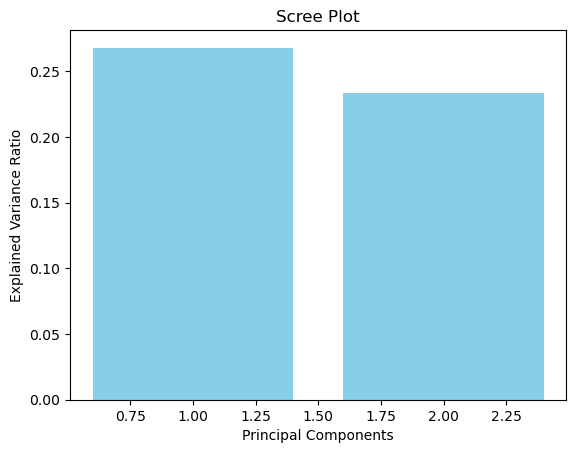

In [43]:
#| code-fold: true
# PCA with components decided above
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_standardized)

# Scree Plot
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio for Each Component:")
print(explained_variance_ratio)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='skyblue')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()


These principal components are linear combinations of the original features and provide a new coordinate system capturing the most important patterns in the data. As you can see, the first few components capture a majority of the variance. 

### Plotting PCA

Below I have created a scatter plot that shows the first two principal components. Currently, you can not infer much from the plot but once I apply clustering we will be able to gather more insights.

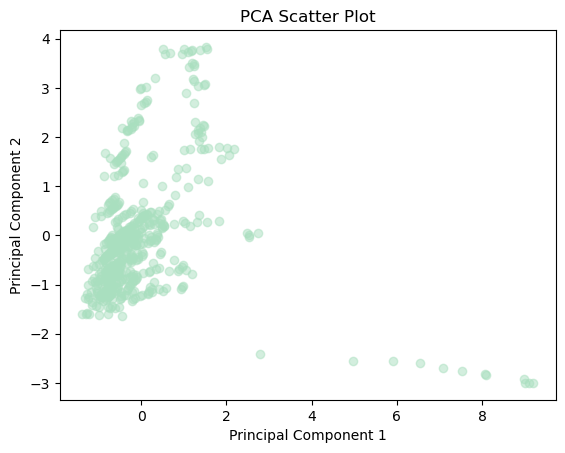

In [44]:
#| code-fold: true
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, color='#A9DFBF')
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## Findings and Conclusions 

In the reduced-dimensional space created by PCA, each point represents an observation projected onto the principal components. Points that are close together share similar patterns along these principal components. Within the plot above, there are definitely points close together meaning they are similar. 

It is important to note that PCA is good at finding linear relationships meaning that there are definitely observations within this data set that are far away and have a higher variability. 

